In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [29]:
x = np.random.normal(size = 10000)
x = x.reshape(100, 100)
x = np.sort(x)

In [30]:
y = np.sin(1 + x**2)
y.shape

(100, 100)

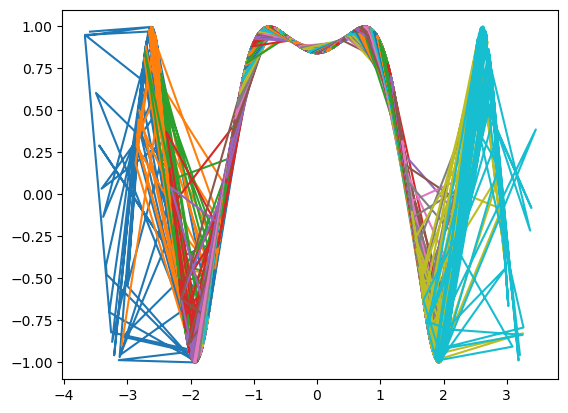

In [38]:
plt.plot(x, y)

In [42]:
phi = x.reshape(100, len(x), 1)
y = y.reshape(100, len(y), 1)

print(phi.shape)
print(y.shape)

(100, 100, 1)
(100, 100, 1)


In [47]:
M = 9

In [48]:
y_hats = np.empty_like(y.T)

for m in range(M):
    phi_poly = np.repeat(phi, m + 1, 2) # Design matrix.

    for i in range(m + 1):
        # Important step: Convert training and validation data into polynomial form.
        phi_poly[:, i] = np.power(phi_poly[:, i], i + 1)

    # Find weights using Least Square Solution
    b = np.linalg.inv(phi_poly.T.dot(phi_poly)).dot(phi_poly.T).dot(y)

    yhat = phi_poly.dot(b)
    y_hats = np.vstack((y_hats, yhat.T))

y_hats = y_hats[1:, :]
print(y_hats.shape)

LinAlgError: Last 2 dimensions of the array must be square